## **РК №1 Григорян Александр ИУ5-64Б**
### **Вариант №3**

**Задача №1. Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.**

**Датасет №3:** https://www.kaggle.com/carlolepelaars/toy-dataset

In [10]:
import pandas as pd

# Чтение CSV файла
df = pd.read_csv("sample_data/toy_dataset.csv")
# Список столбцов
print(df.columns)
# Просмотр первых 5 строк DataFrame
print(df.head())

Index(['Number', 'City', 'Gender', 'Age', 'Income', 'Illness'], dtype='object')
   Number    City Gender   Age   Income Illness
0       1  Dallas   Male  41.0  40367.0      No
1       2  Dallas   Male  54.0  45084.0      No
2       3  Dallas   Male  42.0  52483.0      No
3       4  Dallas   Male   NaN      NaN      No
4       5  Dallas   Male   NaN      NaN      No


In [11]:
# Проверка наличия хотя бы одного пропущенного значения
has_missing_values = df.isnull().values.any()
print("Есть ли пропущенные значения:", has_missing_values)

# Подсчет общего количества пропущенных значений
total_missing_values = df.isnull().sum().sum()
print("Общее количество пропущенных значений:", total_missing_values)

# Список столбцов
print(df.columns)

Есть ли пропущенные значения: True
Общее количество пропущенных значений: 10
Index(['Number', 'City', 'Gender', 'Age', 'Income', 'Illness'], dtype='object')


In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(df.columns)

# Преобразование категориальных переменных в dummy-переменные
df = pd.get_dummies(df, columns=['City', 'Gender', 'Illness'])

# Вывод преобразованного DataFrame
print(df)

Index(['Number', 'City', 'Gender', 'Age', 'Income', 'Illness'], dtype='object')
        Number   Age    Income  City_Austin  City_Boston  City_Dallas  \
0            1  41.0   40367.0        False        False         True   
1            2  54.0   45084.0        False        False         True   
2            3  42.0   52483.0        False        False         True   
3            4   NaN       NaN        False        False         True   
4            5   NaN       NaN        False        False         True   
...        ...   ...       ...          ...          ...          ...   
149995  149996  48.0   93669.0         True        False        False   
149996  149997  25.0   96748.0         True        False        False   
149997  149998  26.0  111885.0         True        False        False   
149998  149999  25.0  111878.0         True        False        False   
149999  150000  37.0   87251.0         True        False        False   

        City_Los Angeles  City_Mountain Vie

In [13]:
# Замена пропущенных значений на среднее значение в столбце
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [14]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

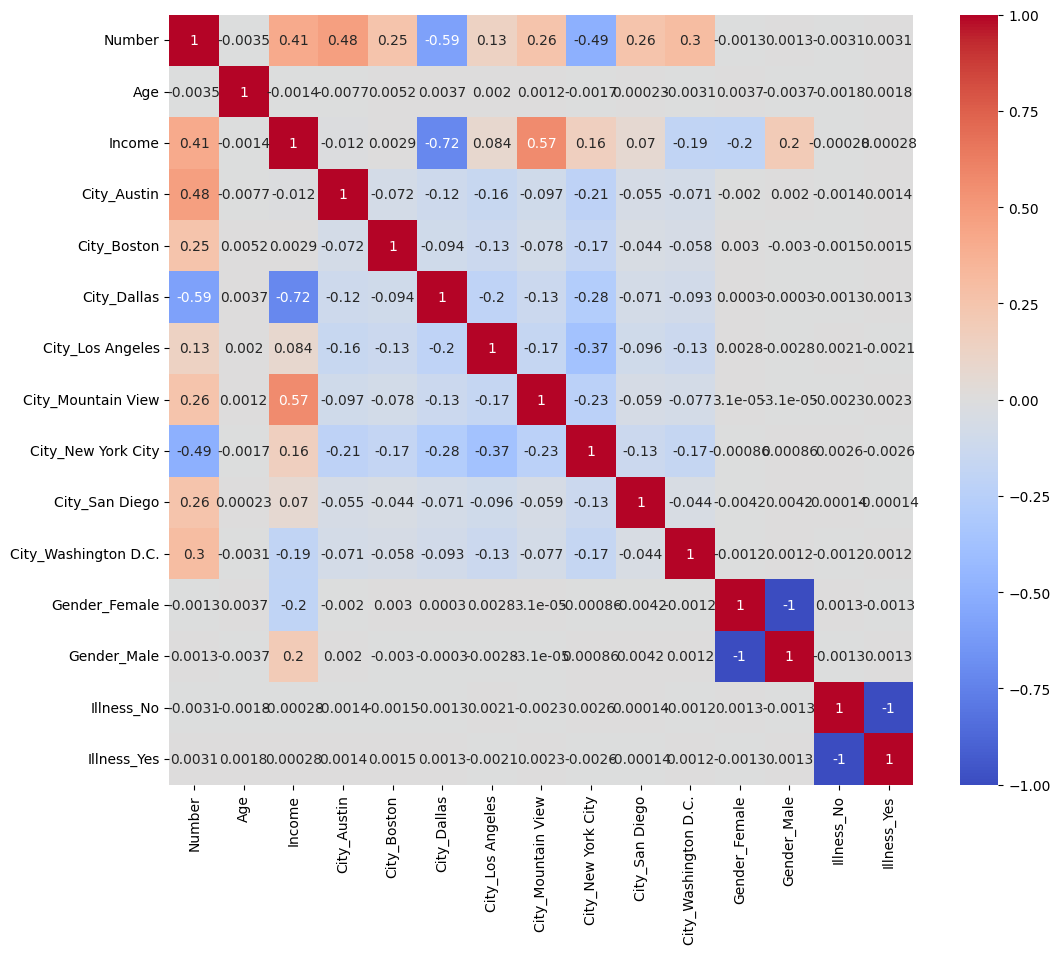

In [15]:
# Вычисление матрицы корреляции
correlation_matrix = df.corr(numeric_only=True)

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

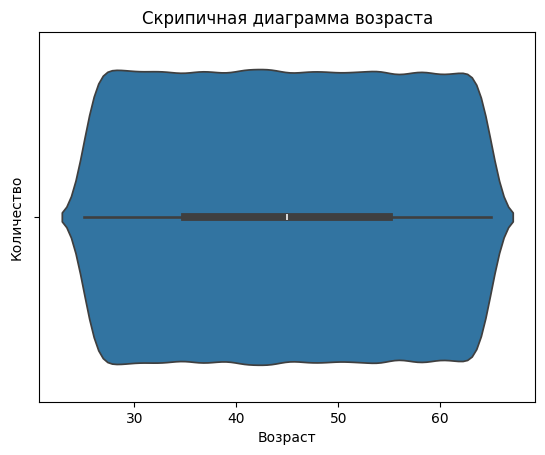

In [16]:
import seaborn as sns

# Создание скрипичной диаграммы для колонки 'Age'
sns.violinplot(x=df['Age'])

# Настройка заголовка и осей
plt.title('Скрипичная диаграмма возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')

# Отображение графика
plt.show()

Для сделания выводов о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель датасета, был проведен анализ важности признаков. Этот анализ поможет определить, какие признаки наиболее значимы для предсказания целевой переменной (это может быть 'Income' - годовой доход человека).

*   Вычисление матрицы корреляции: В решении была вычислена матрица корреляции для датасета, чтобы увидеть, как сильно связаны различные признаки между собой и с целевой переменной.

*   Анализ важности признаков: После вычисления матрицы корреляции, можно использовать различные методы для определения важности признаков. Один из подходов - использовать коэффициенты корреляции для оценки влияния каждого признака на целевую переменную. Признаки с высокой абсолютной корреляцией с целевой переменной могут быть наиболее важными. Например, ячейки выше показывает, что корреляция между Income (годовой доход человека) и
Сity_Mountain_View составляет 0,57, что указывает на сильную положительную корреляцию. Большие доходы тесно связано с городом проживания. Однако корреляция не всегда указывает на причинно-следственные связи, и важно также учитывать другие факторы.

*   Использование моделей машинного обучения для оценки важности признаков: Некоторые модели машинного обучения, такие как случайные леса (Random Forests), могут предоставить более детальную информацию о важности признаков. В случайных лесах, например, можно использовать атрибут feature_importances_ для получения относительных важностей признаков. Этот метод может дать более глубокое понимание того, какие признаки наиболее важны для предсказания целевой переменной, учитывая не только линейные, но и нелинейные взаимосвязи между признаками

*   Визуализация важности признаков: Визуализация важности признаков может помочь в интерпретации результатов. В решении я использовал скрипичную диаграмму, которая позволяет визуализировать распределение данных (в данном случае распределение возраста - Age), показывая медиану, квартили и выбросы.
Это может помочь в выборе признаков для дальнейшего анализа или моделирования для отображения важности признаков

